# Pedestrian and Incident Report Data

This project takes a look at combining modeling of pedestrian traffic with police incident reports in San Francisco.  This is convenient because both peices of data are given in relation to street intersection, allowing for the two datasets to be joined with some minor tweaking of intersection.

A possible use of this data would be to determine how changing pedestrian traffic might affect policing efforts.  For example, if foot traffic in a neighborhood were projected to increase, city planners might want to know if additional police officers need to be committed to the area to ensure public safety.  These city planers could analyze this dataset to observe similar patterns elsewhere in the city and draw conclusions from that.

Another use could be to determine if certain _types_ of crime are correlated with pedestrian traffic.  If heavy foot traffic is found to predict higher rates of certain types of crime, this could be used to improve officer training. 

## Data

Both datasets come from datasf.org:

Pedestrian data: https://data.sfgov.org/Transportation/Pedestrian-Volume-Model/awac-r27z
Incident Report data: https://data.sfgov.org/Public-Safety/Police-Department-Incident-Reports-2018-to-Present/wg3w-h783

In [1]:
import pandas as pd

In [2]:
inc = pd.read_csv('incident_reports.csv')

In [3]:
ped = pd.read_csv('pedestrian_volume.csv')

In [4]:
# remove unhelpful IDs
del inc['Row ID']
del inc['Incident ID']
del inc['Incident Number']
del inc['CAD Number']

In [5]:
# produce a new column in ped that matches intersection format of inc
ped = ped.assign(
    Intersection=ped.apply(lambda x: x.ST_NAME1 + ' ' + x.ST_TYPE1 + ' \\ ' + x.ST_NAME2 + ' ' + x.ST_TYPE2, axis=1)
)

In [6]:
# merge both datasets across intersection
comb = pd.merge(inc, ped, on='Intersection')

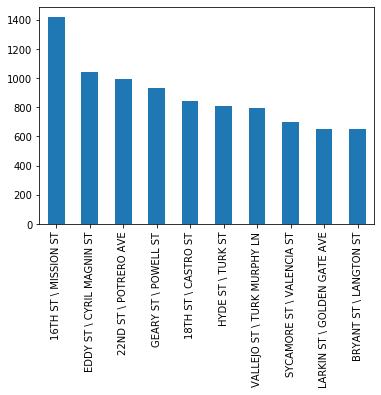

In [8]:
# the ten intersections with most incident reports
comb['Intersection'].value_counts()[:10].plot(kind='bar')